<a href="https://colab.research.google.com/github/PyBeginner1/MushroomClassifier/blob/main/MushroomClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#text data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 

from sklearn.metrics import accuracy_score

In [34]:
shrooms = pd.read_csv('/content/mushrooms.csv')

In [35]:
shrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In class column, 

P ---> Poisonous

e ---> Edible

In [36]:
shrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

Preprocessing

In [37]:
mappings = list()
encoder = LabelEncoder()

for column in shrooms.columns:
  shrooms[column] = encoder.fit_transform(shrooms[column])
  mappings_dict = {index : label for index, label in enumerate(encoder.classes_)}
  mappings.append(mappings_dict)

In [39]:
shrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [38]:
#mappings shows the dictionary values
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

Splitting labels & target


In [41]:
X = shrooms.drop('class', axis = 1)
Y = shrooms['class']

In [42]:
print(X
)

      cap-shape  cap-surface  cap-color  ...  spore-print-color  population  habitat
0             5            2          4  ...                  2           3        5
1             5            2          9  ...                  3           2        1
2             0            2          8  ...                  3           2        3
3             5            3          8  ...                  2           3        5
4             5            2          3  ...                  3           0        1
...         ...          ...        ...  ...                ...         ...      ...
8119          3            2          4  ...                  0           1        2
8120          5            2          4  ...                  0           4        2
8121          2            2          4  ...                  0           1        2
8122          3            3          4  ...                  7           4        2
8123          5            2          4  ...                  4  

In [43]:
print(Y)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64


Scaling

In [44]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X))

In [45]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,1.781460,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,1.781460,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,1.781460,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,-1.045952,0.683778,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,-1.045952,0.683778,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,-1.045952,0.683778,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,-1.045952,0.683778,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [47]:
print(X.shape, X_train.shape, X_test.shape)

(8124, 22) (6499, 22) (1625, 22)


Checkinh number of 0s & 1s in class

In [49]:
np.sum(Y) / len(Y)

0.48202855736090594

Model

In [52]:
log_model = LogisticRegression()
svm_model = SVC(C = 1.0, kernel = 'rbf')
nn_model = MLPClassifier(hidden_layer_sizes =(128,128))

In [53]:
log_model.fit(X_train, Y_train)
svm_model.fit(X_train, Y_train)
nn_model.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128, 128), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [60]:
print(f'Logistic Regression: {log_model.score(X_test,Y_test)}')
print(f'                SVM: {svm_model.score(X_test, Y_test)}')
print(f'     Neural Network: {nn_model.score(X_test,Y_test)}')

Logistic Regression: 0.9575384615384616
                SVM: 1.0
     Neural Network: 1.0


Visualization

In [61]:
correlation = shrooms.corr()

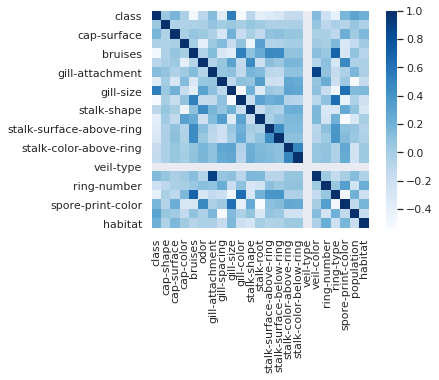

In [65]:
sns.set()
plt.plot(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = True, annot = False, fmt = '.1f', cmap = 'Blues')

Making a predictive System

In [68]:
input_data = (5,	2,	4,	1,	6,	1,	0,	1,	4,	0,	3,	2,	2,	7,	7,	0,	2,	1,	4,	2,	3,	5)    #using 1st row value in dataset

input_data_numpy = np.asarray(input_data)

input_data_reshape = input_data_numpy.reshape(1,-1)
prediction = nn_model.predict(input_data_reshape)
if prediction == 1:
  print('Mushroom is poisonous')
else:
  print('Mushroom is edible')

Mushroom is poisonous


In [71]:
input_data = (5,	2,	3,	0,	5,	1,	1,	0,	4,	1,	3,	2,	2,	7,	7,	0,	2,	1,	0,	3,	0,	1)      #using 5th row value

input_data_numpy = np.asarray(input_data)

input_data_reshape = input_data_numpy.reshape(1,-1)
prediction = nn_model.predict(input_data_reshape)
if prediction == 1:
  print('Mushroom is poisonous')
else:
  print('Mushroom is edible')

Mushroom is edible
